In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
from google.colab import files
uploaded=files.upload()

Saving bank_churn.csv to bank_churn.csv


In [3]:
df=pd.read_csv("bank_churn.csv")

In [4]:
print("SUMMARY STATISTICS\n")
print("\nFirst 5 rows\n",df.head)
print("No. of Rows and columns",df.shape)
print("\nNull Values\n",df.isnull().sum())

SUMMARY STATISTICS


First 5 rows
 <bound method NDFrame.head of       ID  active_member  age  credit_score  estimated_salary  products_number  \
0      0              0   35           639     170483.900000                2   
1      1              0   54           781     161360.846389                1   
2      2              1   51           605     165574.540000                1   
3      3              1   48           555      79134.780000                2   
4      4              1   53           693      62550.218278                2   
..   ...            ...  ...           ...               ...              ...   
595  595              1   63           523     119404.630000                1   
596  596              0   35           703     167810.260000                2   
597  597              1   39           609     175664.250000                1   
598  598              0   31           661     167023.219341                2   
599  599              0   35           675  

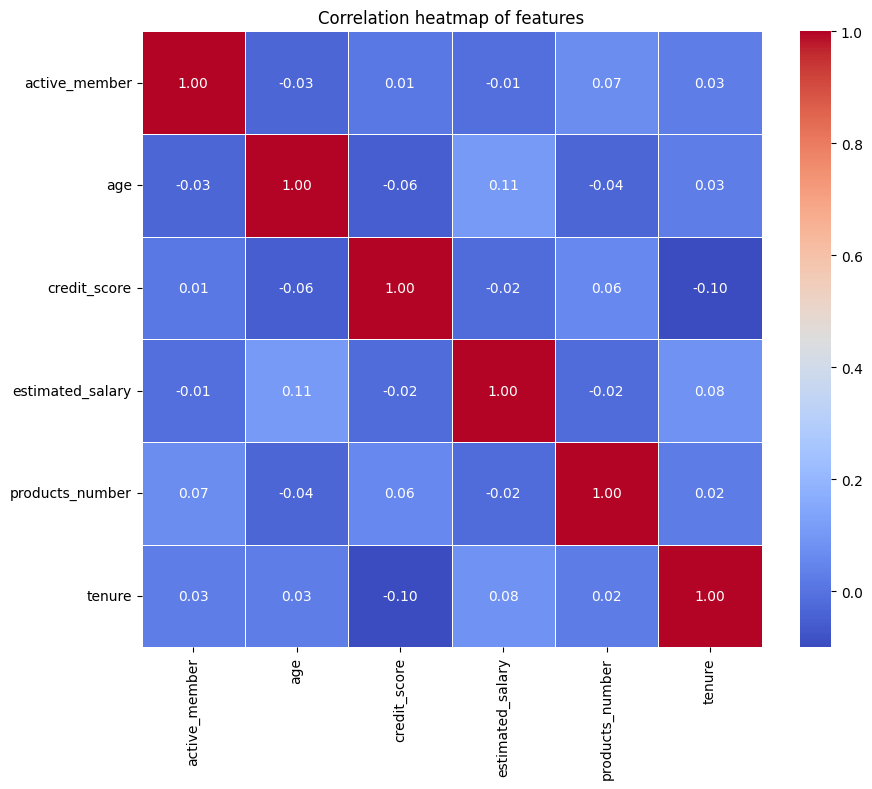

In [5]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(columns=['ID','churn']).corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5)
plt.title("Correlation heatmap of features")
plt.show()

In [6]:
x=df.drop('churn',axis=1)
y=df['churn']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_proba = lr.predict_proba(x_test)[:, 1]

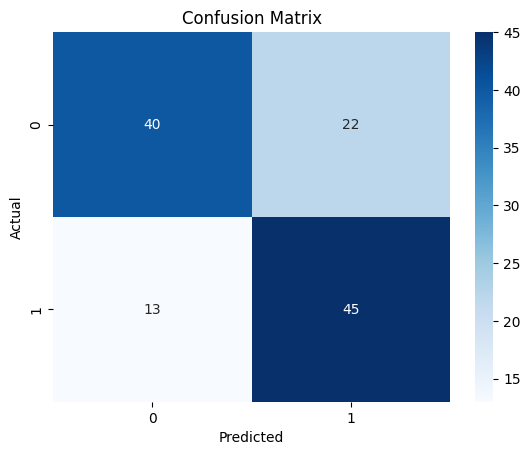

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [8]:
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.8264738598442715


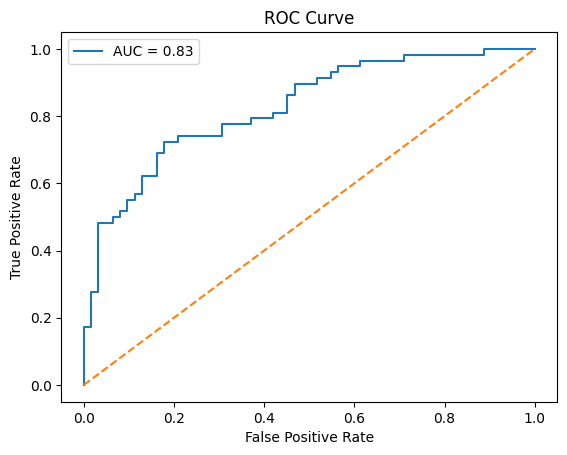

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70        62
           1       0.67      0.78      0.72        58

    accuracy                           0.71       120
   macro avg       0.71      0.71      0.71       120
weighted avg       0.71      0.71      0.71       120



In [11]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results.to_csv("predictions.csv", index=False)
print("Saved predictions to predictions.csv")

Saved predictions to predictions.csv
